<h1 style = "padding: 20px; text-align: center;">Exploring the Titanic Survival Dataset.</h1>

We'll start off by loading the required base libraries for the project. These are the only ones we need to manipulate and visualize our data.

In [1]:
#libraries required for data wrangling.
import numpy as np
import pandas as pd

#libraries required for visual feature analysis.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading and Viewing the Training and Test Data.
Enter the path to the folder containing the .csv files in the `path` variable and replace the file's name with your local copy's in order to load the file.


We then print out the head of our training dataset to take a look at what we've got.

In [2]:
path = 'C:/Users/LENOVO/titanic_project/'

train_df = pd.read_csv(path + 'titanic_train.csv')
test_df = pd.read_csv(path + 'titanic_test.csv')

In [3]:
print("Column names: {}".format(train_df.columns.values))
train_df.head()

Column names: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see, we've the following 12 columns:
*PassengerID : the unique id of the individual passengers
* Survived: survival information, 0 indicates failure(death) while 1 indicates success(survival)
* Pclass: The class in which the passengers were travelling.
* Name: Name of the passengers.
* Sex: Passengers' gender.
* Age: Passengers' Age.
* Parch: Number of parents/gaurdians abord the titanic for each passenger.
* SibSB: Number of siblings aboard the titanic for each passenger.
* Ticket: ticket number of each passenger.
* Fare: Fare that each passenger paid for the voyage.
* Cabin: Cabin number where each passenger stayed.
* Embarked: The city from which each passenger embarked upon the titanic.



The Survived Column is obviously our label i.e. this is what we have to predict, and it is thus missing from the test set.

As for the other columns, categorizing them would help us better understand and decide upon the features.

The following are the categories and the labels that fit in those categories:

* Categorical: Sex and Embarked.
* Ordinal: Pclass
* Numerical: 
    * Continuous: Age and Fare
    * Discreet: SibSp and Parch
* Alphanumerical: Ticket

NOTE: Both `Name` and `PassengerId` can be treated as unique identifiers for each passenger, and thus aren't independant variables that our outcome depends upon. Intuitively, it makes sense because calamity is not subjective.



<h1 style = "padding : 20px; text-align: center;">Looking for patterns</h1>



Now that we understand what our training data consists of, the next step is finding patterns in the data, both good and bad. This will help us decide upon which features may contribute positively or negatively towards model optimization.

    
# 1. Null Values
Let's start by taking a look at the amount of null values in the training data.

In [4]:
print("Null values in training data:\n{}\n\nNull values in test data:\n{}".format(train_df.isnull().sum(), test_df.isnull().sum()))

Null values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values in test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Clearly enough, `Cabin` consits of the most `Nan` values followed by `Age` in case of both training and test data.

Null values generally give machine learning models a very hard time and can lead to substantial reduction in any model's performance. So, we now know that we'll have to deal with these.

# 2. Numerical Values' Distribution.

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the above table, we can observe:
* There are a total of 891 numerical values in each column of the dataset.
* The survival rate among these 891 passengers is around 38%, in comparison to the factual 32% survival rate of the incident reports.
* Nearly 30% of the passengers had siblings aboard.
* Fare variation is low, with the exception of one person paying a relatively large amount of 512 dollars. This is an outlier.
* The mean age of the passengers is 29 years with a standard deviation of 14. Nearly 75% of the passengers are under 38 years of age. A few outliers exist(above 80 years).
* Most of the passengers(nearly 75%) did not travel with parents/gaurdians.

# 3. Categorical Values' Distribution

In [6]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beesley, Mr. Lawrence",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


* As surmised before, all 891 passengers' names are unique.
* 577/891 or around 65% of the passengers are male.
* Ticket numbers have 210 duplicate values.
* Most of the passengers have embarked on the voyage from the city denoted by `S`.
* Out of 204 cabin values, only 147 are unique-indicating the fact that several people shared cabins.

<h1 style = "text-align:center; padding: 20px;">Making the useful corrections</h1>

Using the above observations, we can do the following from the get-go:
* Drop the `Name` and `PassengerId` columns since they're not features.
* Drop `Cabin` because of its high null value count.
* Drop `Ticket` because of its low unique value count.

One thing to note here, that the default parameter for `axis` in `df.drop()` command is 0, which means it looks for the specified values to be dropped in the rows. It's easy to forget about this and spend 20 minutes debugging what went wrong in the code. *Always sepcify axis = 1 while dropping rows form a dataframe.*

In [7]:
to_drop = ['Name', 'PassengerId', 'Cabin', 'Ticket']
train_df.drop(to_drop, axis = 1, inplace = True)
test_df.drop(to_drop, axis = 1, inplace = True)
print("Column Names: {}".format(np.unique(train_df.columns.values.tolist() + test_df.columns.values.tolist())))

Column Names: ['Age' 'Embarked' 'Fare' 'Parch' 'Pclass' 'Sex' 'SibSp' 'Survived']


Now that that's taken care of, we have only one thing to worry about, that is the `Age` column which will be dealt with shortly.

<h1 style = "padding: 20px; text-align: center;">Correlation among and relevance of features</h1>

# 1. Pivoting individual features.
In this step, we "pivot" each feature with it's survival rate and print the result. The goal here is to look for patterns and answer natural questions of the form : *Did the Gender/Age/class of the passenger have any relation with their survival?"


In [8]:
pivots = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
for pivot in pivots:
    print("Feature: {}\n\n".format(pivot), train_df[[pivot, 'Survived']].groupby([pivot], as_index=False).mean().sort_values(by='Survived', ascending=False))

Feature: Age

       Age  Survived
0    0.42       1.0
9    5.00       1.0
79  63.00       1.0
68  53.00       1.0
1    0.67       1.0
..    ...       ...
37  28.50       0.0
49  36.50       0.0
46  34.50       0.0
26  20.50       0.0
30  23.50       0.0

[88 rows x 2 columns]
Feature: Embarked

   Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
Feature: Fare

          Fare  Survived
247  512.3292       1.0
196   57.9792       1.0
89    13.8583       1.0
88    13.7917       1.0
86    13.4167       1.0
..        ...       ...
103   15.5500       0.0
180   47.1000       0.0
179   46.9000       0.0
178   42.4000       0.0
124   21.0750       0.0

[248 rows x 2 columns]
Feature: Parch

    Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
Feature: Pclass

    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Feature: Sex

       Se

* The gender of the passengers have a very strong correlation with survival rate. This feature is thus crucial for prediction.
* SibSp and Parch values have almost no correlation with survival above a certain value. Thus we can combine these features to form a better predictor.
* Passenger's class also has a high correlation with survival rate.

# 2. Visualizing relevant feature(s).

We can observe some relationships within and among features by visually depicting their survival rates next to each other using a graph.

Lets's begin by plotting the different `Pclass` categories next to each other based on their corresponding survival rates.

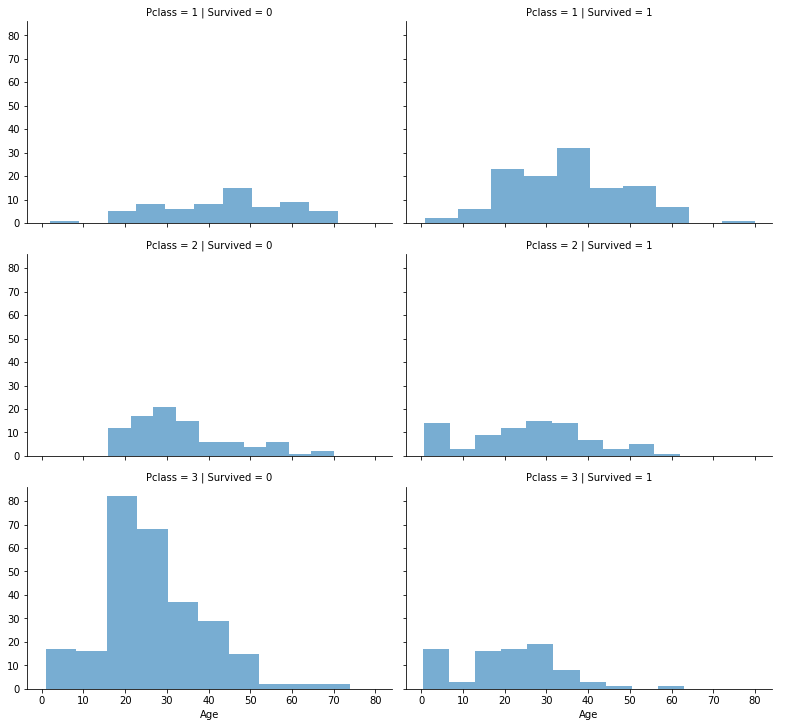

In [9]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3.4, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=10)
grid.add_legend();

This is an interesting result and depicts the need of understanding the data well.

As we see here, the passengers of class 3 had a significantly lesser surival rate in comparison to those who were travelling in class 1.
Although we might have guessed this intuitively, we can now evidently conclude(in a non-statistical sense) that higher class travelling passengers did have a higher rate of survival.

Mean Age of Passengers: 29.69911764705882


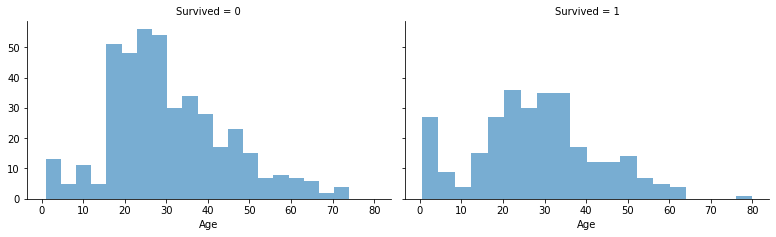

In [10]:
grid = sns.FacetGrid(train_df, col = 'Survived', height = 3.4, aspect = 1.6)
print("Mean Age of Passengers: {}".format(train_df['Age'].mean()))
grid.map(plt.hist, 'Age', alpha = 0.6,  bins = 20)

* Infants, and children (age <= 5) survived in the largest amount.
* Most deaths are observed in adults of 15-30 years of age.
* The only person above the age of 80 survived as well.

Thus, we should also include age in our model features and find a way to fill in the gaps for missing features.

The mean age of the passengers is observed to be 29.69, which can be used to substitute for the `NaN` values.